<a href="https://colab.research.google.com/github/duckmanBR/desafios-dio-acw/blob/main/desafio_metricas_de_avaliacao_aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from tensorflow.keras import datasets, layers, models, metrics
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [40]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [41]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.8959 - loss: 0.3315 - val_accuracy: 0.9852 - val_loss: 0.0429
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9860 - loss: 0.0443 - val_accuracy: 0.9878 - val_loss: 0.0371
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9903 - loss: 0.0313 - val_accuracy: 0.9885 - val_loss: 0.0344
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9930 - loss: 0.0234 - val_accuracy: 0.9902 - val_loss: 0.0323
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9937 - loss: 0.0186 - val_accuracy: 0.9912 - val_loss: 0.0259


In [43]:
prediction_prob = model.predict(test_images)
prediction_labels = np.argmax(prediction_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


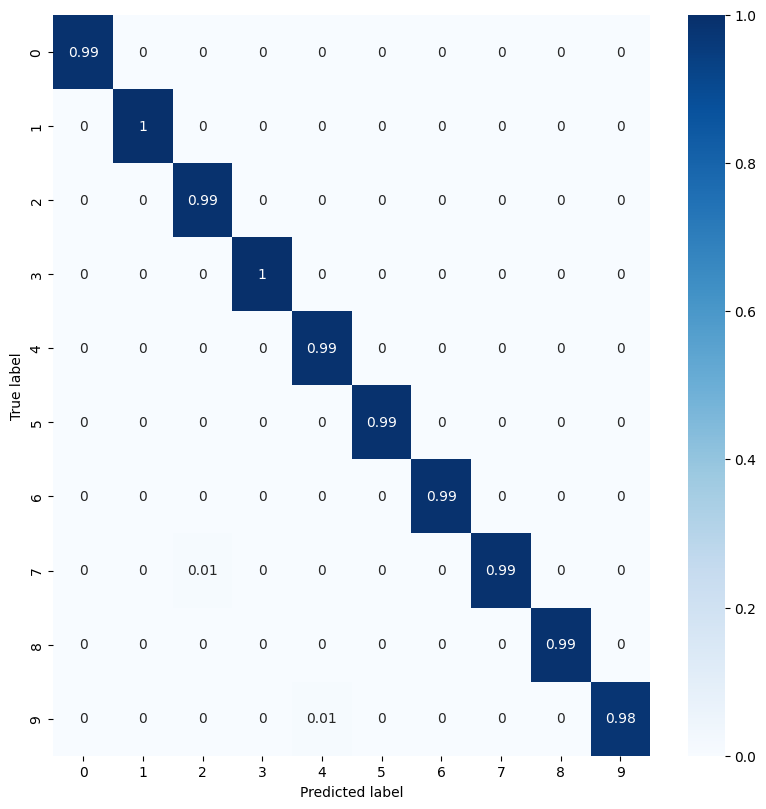

In [44]:
matriz_classes = confusion_matrix(test_labels, prediction_labels)

con_mat_norm = np.around(
    matriz_classes.astype("float") / matriz_classes.sum(axis=1)[:, np.newaxis], decimals=2
)

con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [45]:
# extrai os elementos de cada classe

def elementos_classe(indice_classe):
    # Verdadeiros Positivos

    metrica_VP = matriz_classes[indice_classe, indice_classe]

    # Falsos Positivos

    metrica_FP = np.sum(matriz_classes[:, indice_classe]) - metrica_VP

    # Falsos Negativos

    metrica_FN = np.sum(matriz_classes[indice_classe, :]) - metrica_VP

    # Verdadeiros Negativos

    metrica_VN = np.sum(matriz_classes) - (metrica_VP + metrica_FN + metrica_FP)

    return {'VP': metrica_VP, 'FN': metrica_FN, 'FP': metrica_FP, 'VN': metrica_VN}

In [46]:
from sklearn.metrics import classification_report
nomes_classes = ['cl0', 'cl1', 'cl2', 'cl3', 'cl4', 'cl5', 'cl6', 'cl7', 'cl8', 'cl9']


In [47]:
def calculo_acuracia_geral(test_labels, prediction_labels):
  correct_predictions = np.trace(matriz_classes)
  total_predictions = np.sum(matriz_classes)
  accuracy = correct_predictions / total_predictions
  return accuracy

#print(calculo_acuracia_geral(test_labels, prediction_labels))

In [48]:
def calculo_precisao_classe(indice_classe):
    metrica = elementos_classe(indice_classe)
    return metrica["VP"] / (metrica["VP"] + metrica["FP"])


def calculo_precisao_geral():
    somaVP, somaFP = 0, 0
    for i, x in enumerate(classes):
        somaVP += elementos_classe(i)["VP"]
        somaFP += elementos_classe(i)["FP"]
    return somaVP / (somaVP + somaFP)


#print(calculo_precisao_classe(7))
#print(calculo_precisao_geral())

In [49]:
def calculo_sensibilidade_classe(indice_classe):
  metrica = elementos_classe(indice_classe)
  return metrica['VP'] / (metrica['VP'] + metrica['FN'])

def calculo_sensibilidade_geral():
  somaVP, somaFN = 0, 0
  for i, x in enumerate(classes):
    somaVP += elementos_classe(i)["VP"]
    somaFN += elementos_classe(i)["FN"]
  return somaVP / (somaVP + somaFN)

#print(calculo_sensibilidade_classe(2))
#print(calculo_sensibilidade_geral())

In [50]:
def calculo_especificidade_classe(indice_classe):
  metrica = elementos_classe(indice_classe)
  return metrica['VN'] / (metrica['VN'] + metrica['FP'])

def calculo_especificidade_geral():
  somaVN, somaFP = 0, 0
  for i, x in enumerate(classes):
    somaVN += elementos_classe(i)["VN"]
    somaFP += elementos_classe(i)["FP"]
  return somaVN / (somaVN + somaFP)

#print(calculo_especificidade_classe(2))
#print(calculo_especificidade_geral())

In [51]:
def calculo_fscore_classe(indice_classe):
  precisao = calculo_precisao_classe(indice_classe)
  sensibilidade = calculo_sensibilidade_classe(indice_classe)
  return 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

def calculo_fscore_geral():
  soma_fscore = 0
  for i, x in enumerate(classes):
    soma_fscore += calculo_fscore_classe(i)
  return soma_fscore / len(classes)

#print(calculo_fscore_classe(7))
#print(calculo_fscore_geral())

In [52]:
print(classification_report(test_labels, prediction_labels, target_names=nomes_classes, digits=4))

df = pd.DataFrame({
    'Classes': nomes_classes,
    'Precisão': [calculo_precisao_classe(i) for i in range(len(classes))],
    'Sensibilidade': [calculo_sensibilidade_classe(i) for i in range(len(classes))],
    'Especificidade': [calculo_especificidade_classe(i) for i in range(len(classes))],
    'F-Score': [calculo_fscore_classe(i) for i in range(len(classes))]
}).astype(dict.fromkeys(['Precisão', 'Sensibilidade', 'Especificidade', 'F-Score'], 'float64'))
pd.options.display.float_format = "{:,.4f}".format
print(df)

              precision    recall  f1-score   support

         cl0     0.9939    0.9939    0.9939       980
         cl1     0.9947    0.9982    0.9965      1135
         cl2     0.9923    0.9942    0.9932      1032
         cl3     0.9892    0.9950    0.9921      1010
         cl4     0.9929    0.9939    0.9934       982
         cl5     0.9866    0.9899    0.9882       892
         cl6     0.9875    0.9916    0.9896       958
         cl7     0.9922    0.9864    0.9893      1028
         cl8     0.9887    0.9908    0.9897       974
         cl9     0.9930    0.9772    0.9850      1009

    accuracy                         0.9912     10000
   macro avg     0.9911    0.9911    0.9911     10000
weighted avg     0.9912    0.9912    0.9912     10000

  Classes  Precisão  Sensibilidade  Especificidade  F-Score
0     cl0    0.9939         0.9939          0.9993   0.9939
1     cl1    0.9947         0.9982          0.9993   0.9965
2     cl2    0.9923         0.9942          0.9991   0.9932
3

In [53]:
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

In [54]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(train_labels)
y_onehot_test = label_binarizer.transform(test_labels)

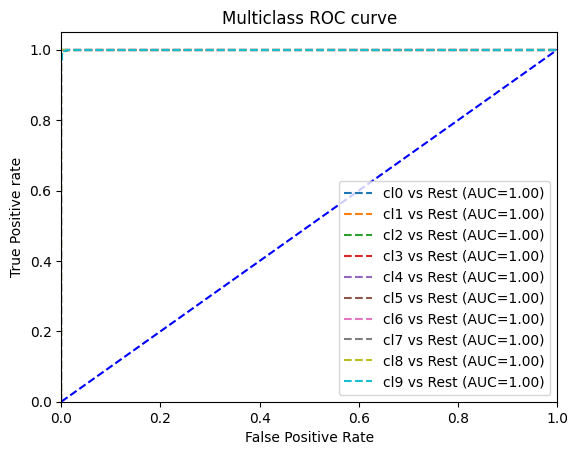

In [55]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

for i, nome in enumerate(nomes_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_onehot_test[:,i], prediction_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(nomes_classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()